# Simple ESPI/ENSO climate index comparison
## Read in my ESPI index and class Nino34 data set

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

from clim_utils import label_latlons

In [2]:
file_nino='/scratch/kpegion/nino34_1982-2019.oisstv2_anoms.nc'
ds_nino=xr.open_dataset(file_nino)
ds_nino

<xarray.Dataset>
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

#### Use `sel` and `slice` to get a time slice for Nino data set to match ESPI

In [3]:
ds_nino=ds_nino.sel(time=slice('1982-01-01','2018-12-01'))
ds_nino

<xarray.Dataset>
Dimensions:  (time: 444)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2018-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (time) float32 0.17045784 -0.04168701 ... 0.8991585 0.88646126

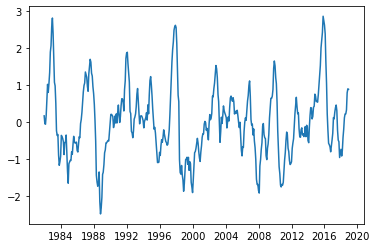

In [4]:
plt.plot(ds_nino['time'],ds_nino['sst'])

In [5]:
file_espi='/homes/jcampb8/data-shell/thesis/espi_1979-2019.nc'
ds_espi=xr.open_dataset(file_espi)
ds_espi=ds_espi.sel(time=slice('1982-01-01','2018-12-01'))
ds_espi

<xarray.Dataset>
Dimensions:  (time: 444)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2018-12-01
Data variables:
    espi     (time) float64 ...

#### In case slicing doesn't work, use function below to match time between two data sets

In [6]:
# Slice time to match Nino data
ds_espi=ds_espi.sel(time=slice(ds_nino['time'][0],ds_nino['time'][-1]))

# Make anomalies
ds_climo=ds_espi.groupby('time.month').mean()
ds_anoms=ds_espi.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:  (time: 444)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2018-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    espi     (time) float64 -0.562 -0.6471 -0.2694 ... 0.3719 0.2888 0.2687

#### Plot both indices on same plot to view differences

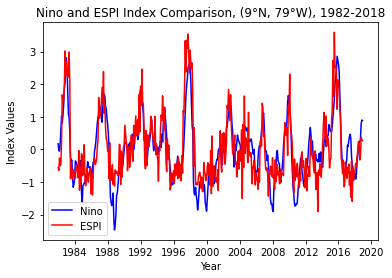

In [7]:
plt.plot(ds_nino['time'],ds_nino['sst'],'b')
plt.plot(ds_anoms['time'],ds_anoms['espi'],'r')
plt.legend(['Nino','ESPI'])
plt.title('Nino and ESPI Index Comparison, (9°N, 79°W), 1982-2018')
plt.xlabel('Year')
plt.ylabel('Index Values')
plt.savefig('Comparison-ESPI,ENSO')

#### Calculate R value (correlation) using `corrcoef`

In [8]:
R=np.corrcoef(ds_nino['sst'],ds_anoms['espi'])
R

array([[1.        , 0.77866509],
       [0.77866509, 1.        ]])

In [9]:
corr=R[0,1]
corr

0.7786650908713777